In [1]:
def load_csv(filename):
    import pandas as pd
    df = pd.read_csv(filename)
    df.rename(columns=lambda x: x.replace(" ", "_"),inplace=True)
    return df

In [2]:
class LinearRegression:   
    def __init__(self, Predictors, Response):
        """
        Initialize Parameters
        """
        self.Predictors = Predictors      # Predictors are the input variables from the data
        self.Response = Response          # Response is the output variable from the data
        m, n = self.Predictors.shape
        x = [0],[1]*(n)
        self.beta = list(x)           # There is one beta for the intercept and a beta for each feature in the data
        
    def beta_ridge(self,ridge):
        import numpy as np
        """
        Beta_ridge = (X.T*X + lambda*I)^-1*X.T*y     where X.T represents X transpose and I is the identity matrix
        """
        X = self.Predictors
        y = self.Response
        inputs = np.concatenate((np.ones((np.shape(X)[0],1)),X),axis=1)
        """
        Variables for this function have been initialized
        """
        self.beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(inputs),inputs)+np.dot(ridge,np.identity(inputs.shape[1]))),np.transpose(inputs)),y)
        return self.beta
    
    def prediction(self, Predictors = []):
        import numpy as np
        b = self.beta
        if not Predictors: Predictors = self.Predictors
        y_pred = np.dot(Predictors,b)
        return y_pred

In [3]:
data = load_csv('mtcars.csv')
data.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [4]:
drop_list = ['name', 'mpg', 'cyl', 'disp', 'drat', 'qsec', 'vs', 'am', 'gear', 'carb']
Predictors = data.drop(drop_list,axis=1)
Response = data['mpg']

C:\Users\ZellaDaGod\.conda\envs\PyTorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hp', ylabel='mpg'>

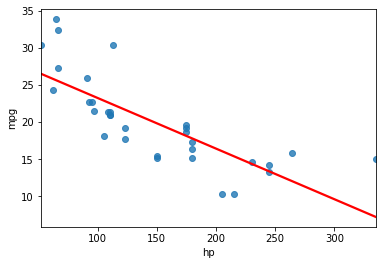

In [5]:
import seaborn as sns
sns.regplot('hp', 'mpg', data, line_kws = {"color":"r"}, ci=None)

In [6]:
x = [[1,110,2.875],[1,80,0.825],[1,95,1.275]]
regressor = LinearRegression(Predictors, Response)
regressor.beta_ridge(0)
pred = regressor.prediction(x)
print("Beta: ", regressor.beta)
print(pred)

Beta:  [ 3.72272701e+01 -3.17729470e-02 -3.87783074e+00]
[22.58348256 31.486224   29.26460596]


In [7]:
x = [[1,110,2.875],[1,80,0.825],[1,95,1.275]]
regressor = LinearRegression(Predictors, Response)
regressor.beta_ridge(0.25)
pred = regressor.prediction(x)
print("Beta: ", regressor.beta)
print(pred)

Beta:  [ 3.39245227e+01 -3.23666897e-02 -2.90656437e+00]
[22.00781425 28.9372719  27.14381758]


In [8]:
x = [[1,110,2.875],[1,80,0.825],[1,95,1.275]]
regressor = LinearRegression(Predictors, Response)
regressor.beta_ridge(0.5)
pred = regressor.prediction(x)
print("Beta: ", regressor.beta)
print(pred)

Beta:  [31.18583409 -0.03270701 -2.10887493]
[21.52504731 26.82945128 25.38985238]


In [9]:
x = [[1,110,2.875],[1,80,0.825],[1,95,1.275]]
regressor = LinearRegression(Predictors, Response)
regressor.beta_ridge(0.75)
pred = regressor.prediction(x)
print("Beta: ", regressor.beta)
print(pred)

Beta:  [28.87763789 -0.03285659 -1.44352537]
[21.11327794 25.05820254 23.91576733]


In [10]:
x = [[1,110,2.875],[1,80,0.825],[1,95,1.275]]
regressor = LinearRegression(Predictors, Response)
regressor.beta_ridge(1)
pred = regressor.prediction(x)
print("Beta: ", regressor.beta)
print(pred)

Beta:  [26.90546248 -0.03285968 -0.88135188]
[20.75701137 23.54957303 22.66006953]
